In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import datetime

sns.set_theme("notebook")
%matplotlib inline

### Chargement des données, séparé par machine

In [18]:
df = pd.read_csv("../../data/prepared_data/dataset.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

df_by_machine = df.groupby("machineID")

# Visualisation temporelle

### Age des composants et défaillance

In [19]:
def composants(machine_number):
    df0 = df_by_machine.get_group(machine_number)
    plt.figure(figsize=(20,8))
    plt.plot(df0["datetime"],df0["comp1_delay"],"r",label="comp1")
    plt.plot(df0["datetime"],df0["comp2_delay"],"b",label="comp2")
    plt.plot(df0["datetime"],df0["comp3_delay"],"g",label="comp3")
    plt.plot(df0["datetime"],df0["comp4_delay"],"orange",label="comp4")
    dates=df0["datetime"].values
    for i,fail in enumerate(df0["comp1"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "r", lw=3)
    for i,fail in enumerate(df0["comp2"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "b", lw=3)
    for i,fail in enumerate(df0["comp3"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "g", lw=3)
    for i,fail in enumerate(df0["comp4"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "orange", lw=3)
    plt.legend()
    plt.show()

Les lignes verticales représentent les défaillances de composants, les courbes brisées linéaires le temps depuis leur dernier remplacement

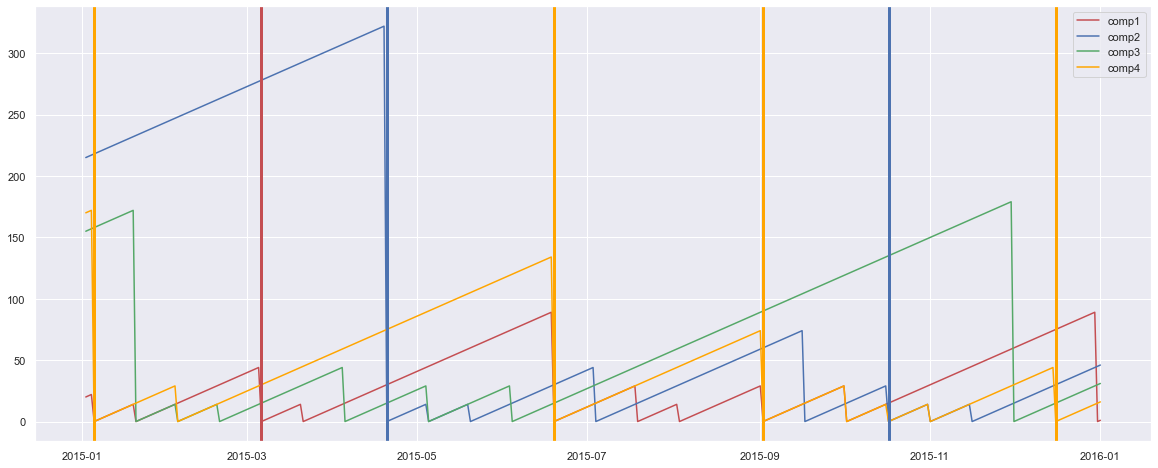

In [20]:
composants(1)

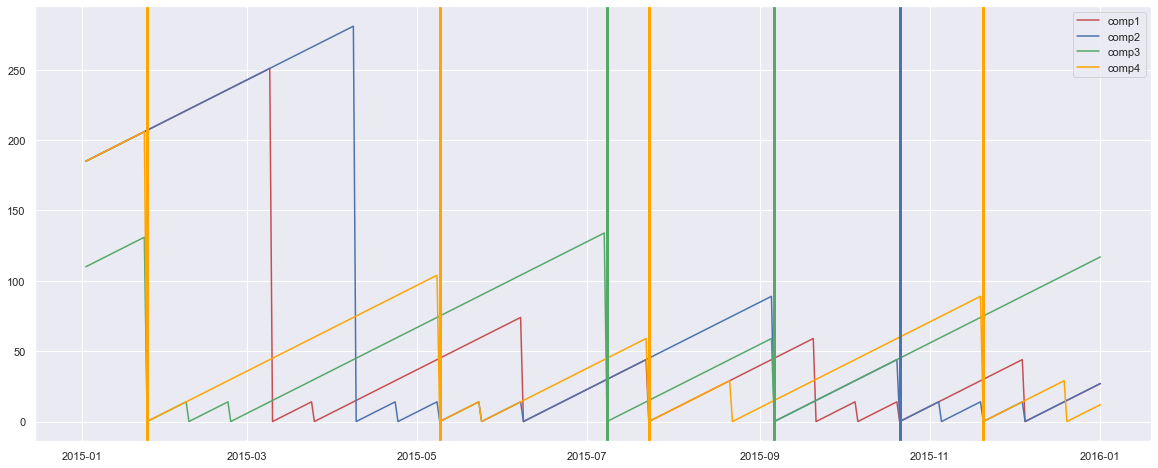

In [21]:
composants(97)

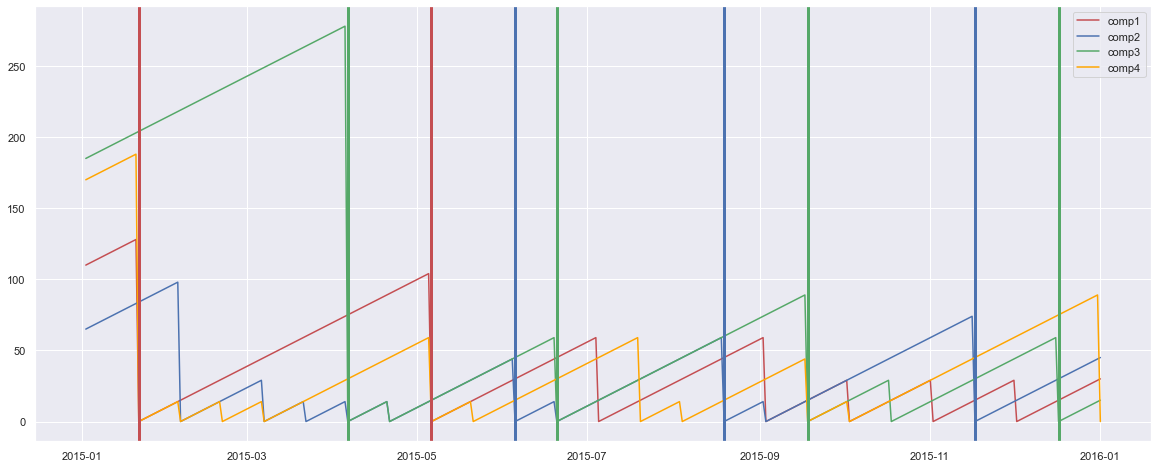

In [22]:
composants(42)

Il n'y a pas de corrélation évidente entre l'age des composants et la défaillance

### Erreurs et défaillances

In [29]:
def erreurs(machine_number):
    df0 = df_by_machine.get_group(machine_number)
    plt.figure(figsize=(20,2))
    dates=df0["datetime"].values
    for i,fail in enumerate(df0["comp1"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "r", lw=3)
    for i,fail in enumerate(df0["comp2"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "b", lw=3)
    for i,fail in enumerate(df0["comp3"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "g", lw=3)
    for i,fail in enumerate(df0["comp4"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "orange", lw=3)
    
    errors=[]
    error_dates = []
    for i,fail in enumerate(df0["error1"]):
        if fail == 1:
            errors.append(1)
            error_dates.append(dates[i])
    for i,fail in enumerate(df0["error2"]):
        if fail == 1:
            errors.append(2)
            error_dates.append(dates[i])
    for i,fail in enumerate(df0["error3"]):
        if fail == 1:
            errors.append(3)
            error_dates.append(dates[i])
    for i,fail in enumerate(df0["error4"]):
        if fail == 1:
            errors.append(4)
            error_dates.append(dates[i])
    for i,fail in enumerate(df0["error5"]):
        if fail == 1:
            errors.append(5)
            error_dates.append(dates[i])
    plt.scatter( error_dates,errors, c=errors)
    plt.xlim([datetime.date(2015, 1, 1), datetime.date(2016, 1, 1)])
    plt.show()

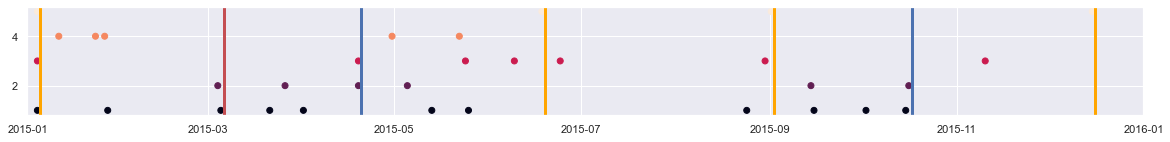

In [30]:
erreurs(1)

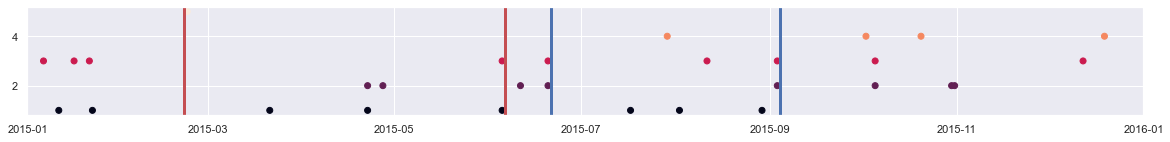

In [31]:
erreurs(36)

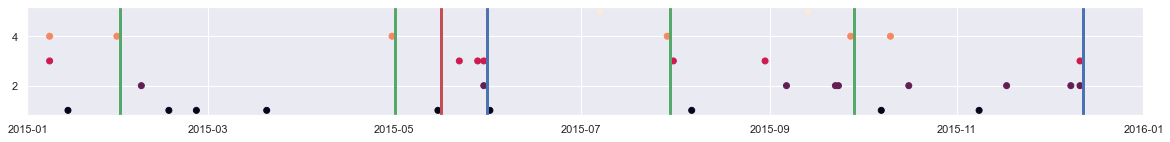

In [32]:
erreurs(58)